In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

C:\Users\RINSU\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\RINSU\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


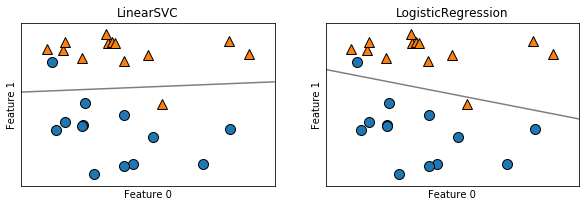

In [191]:
X,y=mglearn.datasets.make_forge()
fig,axes=pl.subplots(1,2,figsize=(10,3))
for model,ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf=model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,ax=ax,eps=0.5,alpha=0.5)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

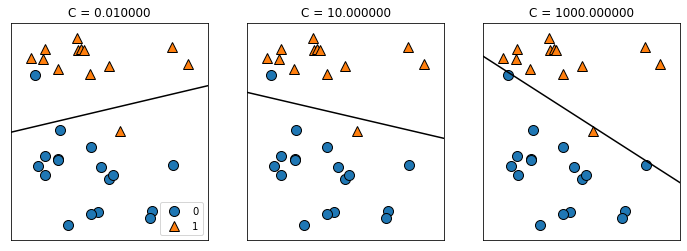

In [192]:
mglearn.plots.plot_linear_svc_regularization()

In [193]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)
logreg=LogisticRegression().fit(X_train,y_train)
logreg.score(X_train,y_train),logreg.score(X_test,y_test)

(0.9882629107981221, 0.9790209790209791)

In [194]:
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_test)
logreg100=LogisticRegression(C=100).fit(X_train,y_train)
logreg100.score(X_train,y_train),logreg100.score(X_test,y_test)

C:\Users\RINSU\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.9953051643192489, 0.9300699300699301)

In [195]:
# logreg.predict([0.00131,0.23123])
logreg001=LogisticRegression(C=0.1).fit(X_train,y_train)
logreg001.score(X_train,y_train),logreg001.score(X_test,y_test)

(0.9835680751173709, 0.972027972027972)

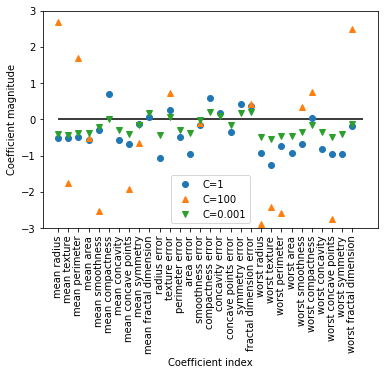

In [196]:
pl.plot(logreg.coef_.T, 'o', label="C=1")
pl.plot(logreg100.coef_.T, '^', label="C=100")
pl.plot(logreg001.coef_.T, 'v', label="C=0.001")
pl.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
pl.hlines(0, 0, cancer.data.shape[1])
pl.ylim(-3, 3)
pl.xlabel("Coefficient index")
pl.ylabel("Coefficient magnitude")
pl.legend()

In [197]:
logreg.coef_.shape

(1, 30)

In [198]:
X_train.shape

(426, 30)

Training accuracy of l1 logreg with C=0.001: 0.89
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.99
Test accuracy of l1 logreg with C=1.000: 0.98
Training accuracy of l1 logreg with C=100.000: 1.00
Test accuracy of l1 logreg with C=100.000: 0.93


C:\Users\RINSU\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


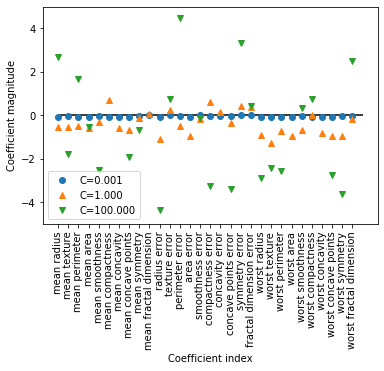

In [199]:
for C,marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C).fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    pl.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
pl.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
pl.hlines(0, 0, cancer.data.shape[1])
pl.xlabel("Coefficient index")
pl.ylabel("Coefficient magnitude")
pl.ylim(-5, 5)
pl.legend(loc=3)

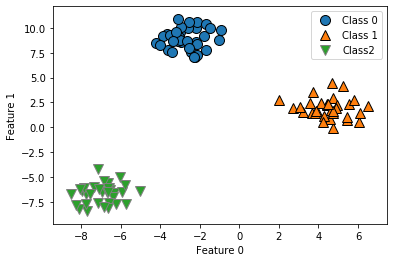

In [200]:
from sklearn.datasets import make_blobs
X,y=make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
pl.xlabel("Feature 0")
pl.ylabel("Feature 1")
pl.legend(["Class 0","Class 1","Class2"])

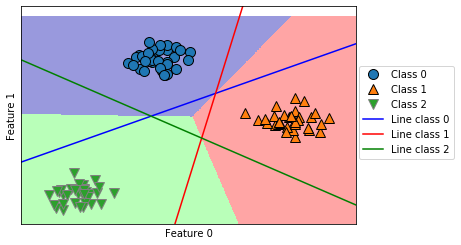

In [201]:
import numpy as np
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha=0.4)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line=np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    pl.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
pl.ylim(-10, 15)
pl.xlim(-10, 8)
pl.xlabel("Feature 0")
pl.ylabel("Feature 1")
pl.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

In [202]:
logreg.fit(X_train,y_train).predict(X_test)

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [203]:
linear_svm.coef_,linear_svm.intercept_

(array([[-0.1749246 ,  0.23140255],
        [ 0.47621616, -0.06936531],
        [-0.18914139, -0.20400579]]),
 array([-1.07745356,  0.13140728, -0.08605   ]))

In [204]:
X.shape

(100, 2)

In [210]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target

In [211]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [212]:
logr=LogisticRegression()
logr.fit(X_train,y_train)

C:\Users\RINSU\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [213]:
svm=LinearSVC().fit(X_train,y_train)

C:\Users\RINSU\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [230]:
# mglearn.plots.plot_2d_classification(svm,X[1:])
# mglearn.discrete_scatter(X[:,1],X[:,3],y)